# EDA Task 5

#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
flights = pd.read_csv('data/flights_10000.csv', index_col=0)
flights.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2018-07-10,WN,WN,WN,2212,WN,N958WN,2212,14683,SAT,...,822.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-10-10,UA,UA,UA,206,UA,N68811,206,13930,ORD,...,1005.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-07-18,AA,AA_CODESHARE,AA,4221,MQ,N694AE,4221,12891,LAW,...,140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-11-25,UA,UA_CODESHARE,UA,4822,ZW,NaN,4822,14685,SAV,...,773.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-10-24,DL,DL,DL,957,DL,N693DL,957,11433,DTW,...,1960.0,0.0,0.0,28.0,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
delays = flights[['cancelled','diverted','air_time','actual_elapsed_time', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'arr_delay']]

In [4]:
delays.head()

,cancelled,diverted,air_time,actual_elapsed_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,arr_delay
0,0.0,0.0,112.0,131.0,822.0,NaN,NaN,NaN,NaN,NaN,-2.0
1,0.0,0.0,134.0,162.0,1005.0,NaN,NaN,NaN,NaN,NaN,-9.0
2,0.0,0.0,28.0,58.0,140.0,NaN,NaN,NaN,NaN,NaN,8.0
3,1.0,0.0,NaN,NaN,773.0,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,271.0,327.0,1960.0,0.0,0.0,28.0,0.0,0.0,28.0


In [8]:
delays.fillna(0, inplace = True)

Carrier Delay: For example, problems with maintenance and crew, cleaning within the cabin, fueling, and baggage loading could all be contributing factors of a delayed flight.

In [10]:
# create departure_delay column. Not including weather delays
delays['departure_delay'] = delays[['carrier_delay','nas_delay','security_delay','late_aircraft_delay']].sum(axis=1)

In [11]:
#create % dept delay col
delays['% dept delay'] = round(delays['departure_delay']/delays['arr_delay']*100)

In [12]:
delays.fillna(0, inplace = True)

In [14]:
delays['air_time_delta'] = delays['air_time']-delays['actual_elapsed_time']      
#will show if the plane was slower or faster than expected (if negative than they took longer in the air than expected)

In [15]:
delay_result = delays[['arr_delay','departure_delay','% dept delay', 'air_time_delta']].sort_values('% dept delay', ascending = False)

<AxesSubplot:xlabel='arr_delay', ylabel='% dept delay'>

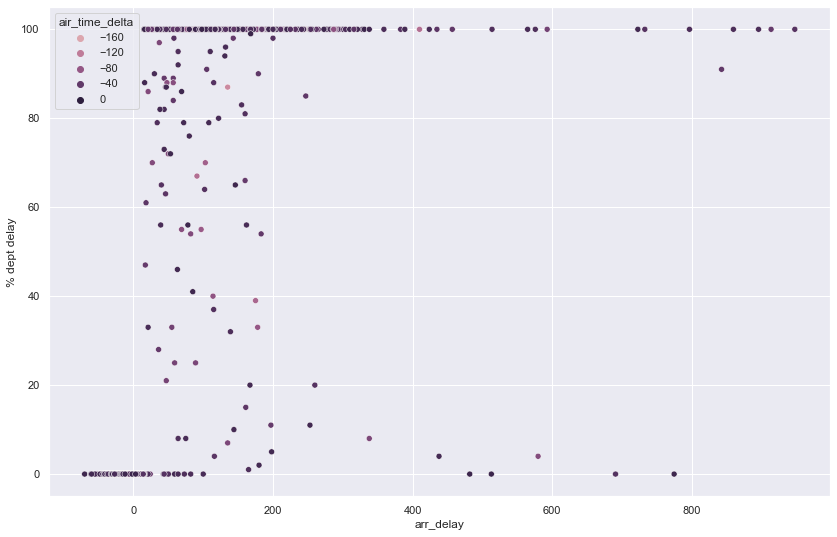

In [23]:
sns.set(rc={'figure.figsize':(14,9)})
sns.scatterplot(data=delay_result, x="arr_delay", y="% dept delay", hue = 'air_time_delta')

Pink means they were way slower than expected, looks like they never made up time in the air.

NOTE: The only delay not incl in deptarture delay is weather delay, so that makes up the rest of the delay here.

In [22]:
delay_result.describe()

,arr_delay,departure_delay,% dept delay,air_time_delta
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.466500,12.105500,17.958900,-24.731800
std,49.373696,42.895086,38.226694,12.265493
min,-70.000000,0.000000,0.000000,-198.000000
25%,-15.000000,0.000000,-0.000000,-29.000000
50%,-6.000000,0.000000,0.000000,-22.000000
75%,7.000000,0.000000,0.000000,-17.000000
max,948.000000,948.000000,100.000000,0.000000


The average delay caused by departures is 12 minutes

In [17]:
#count the number of 100% dept delays
delay_result[['% dept delay', 'departure_delay']].groupby(by = ['% dept delay']).count().sort_values(by = ['departure_delay'], ascending = False).head(3)

,departure_delay
% dept delay,
0.0,8169
100.0,1746
88.0,4


Are airlines able to lower the delay during the flights? looks like no. 

The mean air_time_delta for flights that are exclusively caused by departure delays is -32 mins. So on avg they are still late

In [19]:
delay_result[delay_result['% dept delay'] == 100].describe()

,arr_delay,departure_delay,% dept delay,air_time_delta
count,1746.000000,1746.000000,1746.0,1746.000000
mean,66.309278,66.309278,100.0,-31.879725
std,80.063796,80.063796,0.0,18.872650
min,15.000000,15.000000,100.0,-198.000000
25%,24.000000,24.000000,100.0,-39.000000
50%,40.000000,40.000000,100.0,-26.000000
75%,80.000000,80.000000,100.0,-20.000000
max,948.000000,948.000000,100.0,-5.000000
